Predict the count of bike taken as rent : https://www.kaggle.com/noordeen/bikeshare-data 

Predict Reistered based on temp

In [1]:
import pandas as pd

In [2]:
bike = pd.read_csv(r"D:\DataScience\Classes\05. Linear Regression - 3\Activity\bike_share.csv")

In [3]:
bike.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
bike.shape

(10886, 11)

In [6]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 935.6 KB


In [8]:
bike.describe().T

,count,mean,std,min,25%,50%,75%,max
season,10886.0,2.506614,1.116174,1.00,2.0000,3.000,4.0000,4.0000
holiday,10886.0,0.028569,0.166599,0.00,0.0000,0.000,0.0000,1.0000
workingday,10886.0,0.680875,0.466159,0.00,0.0000,1.000,1.0000,1.0000
weather,10886.0,1.418427,0.633839,1.00,1.0000,1.000,2.0000,4.0000
temp,10886.0,20.230860,7.791590,0.82,13.9400,20.500,26.2400,41.0000
atemp,10886.0,23.655084,8.474601,0.76,16.6650,24.240,31.0600,45.4550
humidity,10886.0,61.886460,19.245033,0.00,47.0000,62.000,77.0000,100.0000
windspeed,10886.0,12.799395,8.164537,0.00,7.0015,12.998,16.9979,56.9969
casual,10886.0,36.021955,49.960477,0.00,4.0000,17.000,49.0000,367.0000
registered,10886.0,155.552177,151.039033,0.00,36.0000,118.000,222.0000,886.0000


In [12]:
bike.isnull().sum()

season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [14]:
bike.duplicated().sum()

21

In [15]:
import seaborn as sns

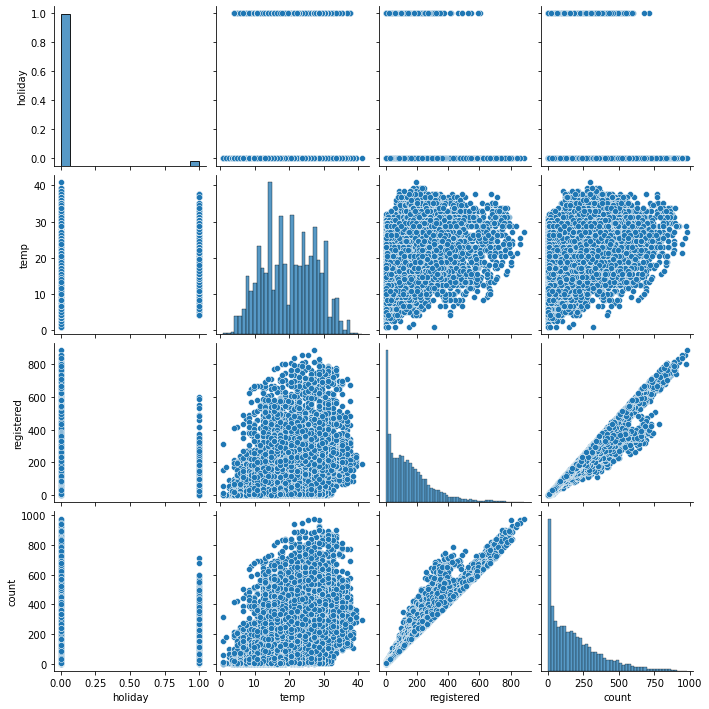

In [35]:
sns.pairplot(bike,vars=['holiday','temp','registered','count'])

## Predict Registerd based on Temp 

In [39]:
import matplotlib.pyplot as plt

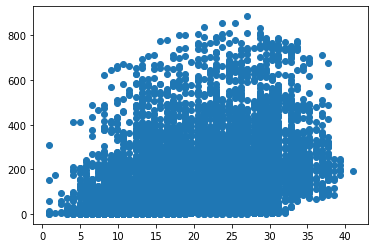

In [41]:
plt.scatter(bike["temp"],bike["registered"])

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lrmdl_reg = LinearRegression()

In [45]:
lrmdl_reg.fit(bike[['temp']],bike['registered'])

LinearRegression()

In [46]:
lrmdl_reg.coef_ ## Slope ie m in y =mx+b

array([6.175466])

In [47]:
lrmdl_reg.intercept_ ## Intercept ie b

30.617190185186146

In [50]:
predict_reg = lrmdl_reg.predict(bike[['temp']])

In [51]:
predict_reg

array([ 91.3837756 ,  86.31989348,  86.31989348, ..., 116.70318619,
       116.70318619, 111.63930408])

In [54]:
actual_reg = bike['registered']
actual_reg

0         13
1         32
2         27
3         10
4          1
        ... 
10881    329
10882    231
10883    164
10884    117
10885     84
Name: registered, Length: 10886, dtype: int64

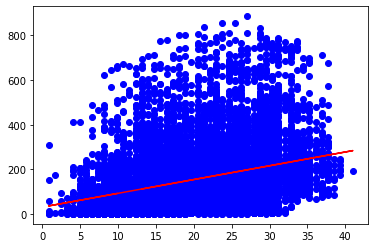

In [58]:
plt.scatter(bike['temp'],bike['registered'], color='blue')
plt.plot(bike['temp'],predict_reg, color='red')
plt.show()

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [62]:
mean_squared_error(actual_reg,predict_reg)

20495.689943766178

In [63]:
mean_absolute_error(actual_reg,predict_reg)

105.72574255435637

In [64]:
r2_score(actual_reg,predict_reg)

0.10148766065580495